## Statistics
### Required exercises

* **Q1.** Think Stats Chapter 2 Exercise 4 (effect size of Cohen's d)
* **Q2.** Think Stats Chapter 3 Exercise 1 (actual vs. biased)
* **Q3.** Think Stats Chapter 4 Exercise 2 (random distribution) 
* **Q4.** Think Stats Chapter 5 Exercise 1 (normal distribution of blue men)
* **Q5.** Bayesian (Elvis Presley twin)
* **Q6.** Bayesian & Frequentist Comparison

* **Q1: Exercise 2.4** Using the variable totalwgt_lb, investigate whether first ba- bies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [42]:
import numpy as np
import nsfg
import first
import thinkstats2

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

cohen_d = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

print("Cohen's d is:", round(abs(cohen_d), 3))

Cohen's d is: 0.089


* **Q2: Exercise 3.1** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no chil- dren have no chance to be in the sample.  
Use the NSFG respondent variable NUMKDHH to construct the actual distribu- tion for the number of children under 18 in the household.  
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.  
Plot the actual and biased distributions, and compute their means.

In [43]:
import numpy as np
import matplotlib as plt
%matplotlib inline

import nsfg
import first
import thinkstats2
import thinkplot

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

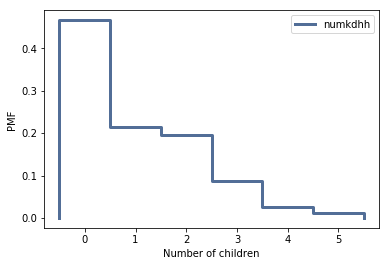

In [44]:
resp = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [45]:
print("Actual mean:", round(pmf.Mean(), 2))

Actual mean: 1.02


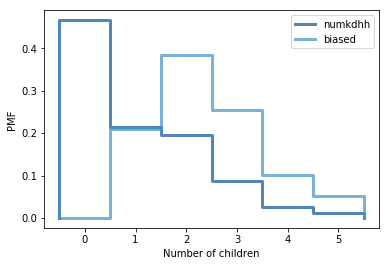

In [46]:
biased = BiasPmf(pmf, label='biased')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [47]:
print("Biased mean:", round(biased.Mean(),2))

Biased mean: 2.4


* **Q3: Exercise 4.2** The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

In [48]:
import numpy as np
import matplotlib as plt
%matplotlib inline

import nsfg
import first
import thinkstats2
import thinkplot

# Generate 1000 numbers
random_numbers = np.random.random(1000)

**PMF**

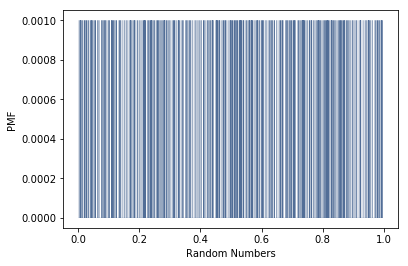

In [49]:
# Plot PMF
random_pmf = thinkstats2.Pmf(random_numbers)
thinkplot.Pmf(random_pmf, linewidth = 0.1)
thinkplot.Config(xlabel = 'Random Numbers', ylabel = 'PMF') 

**CDF**

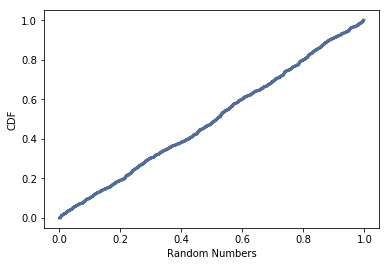

In [50]:
# Plot CDF
random_cdf = thinkstats2.Cdf(random_numbers)
thinkplot.Cdf(random_cdf)
thinkplot.Config(xlabel= 'Random Numbers', ylabel = 'CDF')

* **Q4: Exercise 5.1** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women. In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range?

In [51]:
import thinkstats2
import brfss
import first
import analytic
import numpy as np
import scipy.stats


def inch2cm(inch):
    """Converts inch to centimeter"""
    return 2.54*inch   


# parameters of the normal distribution of heights of men
# unit cm
mu = 178
sigma = 7.7

# normal dist
dist = scipy.stats.norm(loc=mu, scale=sigma)

#For Blue Man Group, 5’10” <= male_height <= 6’1”
#                      70" <= male_height <= 73"

# Solution
low = dist.cdf(inch2cm(70))    # 5'10"
high = dist.cdf(inch2cm(73))   # 6'1"

height_range = high-low
percent_range = round(height_range*100, 2)

print(percent_range, "percent of the U.S. population falls within the Blue Man Group's height range.")

34.27 percent of the U.S. population falls within the Blue Man Group's height range.


* **Q5.** Bayesian (Elvis Presley twin)
(Link to the solution to this problem is given in `07-statistics.md`)

**Bayes Theorem**  
Bayes' Theorem is used for computing the reverse conditional probability that can cannot be directly computed from multiplication rules of conditional probability.

In [8]:
from IPython.display import Math

Math( '{\\mathbf P}(A | B) = \\frac{ {\\mathbf P}(B | A) ~{\\mathbf P}(A) }{ {\\mathbf P}(B)}' )

<IPython.core.display.Math object>

* **Q6.** Bayesian & Frequentist Comparison  
Answer to this question is given in `07-statistics.md`.